In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


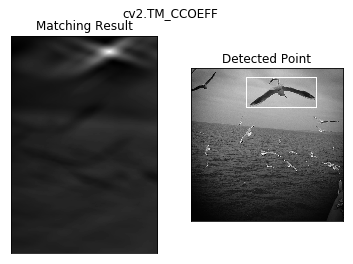

In [8]:

img = cv2.imread('/home/vishnu/my_project_dir/open cv learning/hat detection/kuslar.jpg',0)

template = cv2.imread('/home/vishnu/my_project_dir/open cv learning/hat detection/bird2.png',0)
w, h = template.shape[::-1]

# All the 6 methods for comparison in a list
method_list = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']


meth = method_list[0]
method = eval(meth)

# Apply template Matching
res = cv2.matchTemplate(img,template,method)

    
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

# If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
    top_left = min_loc
    confidence = min_val
else:
    top_left = max_loc

    
bottom_right = (top_left[0] + w, top_left[1] + h)

cv2.rectangle(img,top_left, bottom_right, 255, 2)

plt.subplot(121),plt.imshow(res,cmap = 'gray')
plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img,cmap = 'gray')
plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
plt.suptitle(meth)

plt.show()

